#### **Lecture5 homework: wind turbulence statistics**

Name: San Zhang

Stuent ID: 24S154097

## **Question**

There are two sets of spatial (vertical z and transverse y) wind velocity time history records, with a duration of 10 minutes and a sampling frequency of 100 Hz (i.e., a time interval of 0.01 s). The data are stored in the windData folder.

### 1 Measurement point coordinates

(1) Z-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 0 | 0 | 0 | 0 |
| z(m) | 10 | 30 | 50 | 70 | 90 |

(2) Y-direction measurement point coordinates
| Num. | 1 | 2 | 3 | 4 | 5 |
| --- | --- | --- | --- | --- | --- |
| x(m) | 0 | 0 | 0 | 0 | 0 |
| y(m) | 0 | 20 | 40 | 60 | 80 |
| z(m) | 50 | 50 | 50 | 50 | 50 |

### 2 Target turbulence characteristics
(1) Mean velocity profile
\begin{gather}
U_{avg}(z) = U_r \left(\frac{z}{z_r}\right)^\alpha \\
U_r=50\, \text{m/s},\ z_r=160\, \text{m},\ \alpha=0.22
\end{gather}

(2) Turbulence intensity profiles
\begin{gather}
I_u(z)=I_{10}\left ( \frac{z}{10}  \right )^{-\alpha}, \ I_v(z)=0.78I_u(z), \ I_w(z)=0.55I_u(z) \\
I_{10}=0.23,\alpha=0.22
\end{gather}

(3) Turbulence integral scale profiles
\begin{gather}
L_u^x(z)=100\left ( \frac{z}{30}  \right )^{0.5}, \ L_v^x(z)=0.5L_u^x(z), \ L_w^x(z)=0.5L_u^x(z) \\
\end{gather}

(4) Von Kármán wind spectra
\begin{gather}
S_u(f)=\frac{4(I_u U_{avg})^2(L_u^x/U_{avg})}{\left [ 1+70.8(fL_u^x/U_{avg})^2 \right ]^{5/6}} \\
S_v(f)=\frac{4(I_v U_{avg})^2(L_v^x/U_{avg})(1+188.4(2fL_v^x/U_{avg})^2)}{\left [ 1+70.8(2fL_v^x/U_{avg})^2 \right ]^{11/6}}  \\
S_w(f)=\frac{4(I_w U_{avg})^2(L_w^x/U_{avg})(1+188.4(2fL_w^x/U_{avg})^2)}{\left [ 1+70.8(2fL_w^x/U_{avg})^2 \right ]^{11/6}} 
\end{gather}

(5) Spatial correlation coefficient in the y-direction proposed by Shiotani  
\begin{gather}
\rho_u^y(r)=e^{-\left | r \right | /L_u^y} \\
\rho_v^y(r)=e^{-\left | r \right | /L_v^y} \\
\rho_w^y(r)=e^{-\left | r \right | /L_w^y} \\
L_u^y=60m,\ L_v^y=50m,\ L_w^y=40m
\end{gather}

### 3 Assignment requirements
Read the wind data in the `windData` folder according to the requirements below, calculate the turbulence characteristics, and plot them (the given target turbulence characteristics should be plotted together).

#### **For the z-direction wind velocity time history, calculate:**

(1) Mean velocity profile (calculate the U-component of velocity)

(2) Turbulence intensity profiles (calculate the fluctuating velocity components u, v, and w)

(3) Wind power spectral density (select one point and calculate the fluctuating velocity components u, v, and w)

(4) Probability density curve (select one point, calculate the fluctuating velocity components u, v, and w, and plot the corresponding normal distribution curve)

#### **For the y-direction wind velocity time history, calculate:**

(1) Spatial correlation coefficient in the y-direction (using the first point as the reference point, calculate the fluctuating velocity components u, v, and w)


## **Answer**

### 1 Statistical results of the z-direction wind velocity time history

In [1]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 1.1 Mean velocity profile

In [11]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData
# 定义常量
U_r = 50  # m/s
z_r = 160  # m
alpha = 0.22

# 计算平均速度剖面
def mean_velocity_profile(z):
    return U_r * (z / z_r) ** alpha

# 测量点坐标
z_values = np.array([10, 30, 50, 70, 90])

# 计算各点的平均风速
U_avg_z = mean_velocity_profile(z_values)

# 输出结果
for i, z in enumerate(z_values):
    print(f"高度 {z} m 的平均风速: {U_avg_z[i]:.2f} m/s")

高度 10 m 的平均风速: 27.17 m/s
高度 30 m 的平均风速: 34.60 m/s
高度 50 m 的平均风速: 38.71 m/s
高度 70 m 的平均风速: 41.69 m/s
高度 90 m 的平均风速: 44.06 m/s


#### 1.2 Turbulence intensity profile

In [13]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

# 定义常量
I_10 = 0.23
alpha = 0.22

# 计算湍流强度剖面
def turbulence_intensity_profile(z):
    I_u = I_10 * (z / 10) ** -alpha
    I_v = 0.78 * I_u
    I_w = 0.55 * I_u
    return I_u, I_v, I_w

# 测量点坐标
z_values = np.array([10, 30, 50, 70, 90])

# 计算各点的湍流强度
for z in z_values:
    I_u, I_v, I_w = turbulence_intensity_profile(z)
    print(f"高度 {z} m 的湍流强度: I_u = {I_u:.2f}, I_v = {I_v:.2f}, I_w = {I_w:.2f}")


高度 10 m 的湍流强度: I_u = 0.23, I_v = 0.18, I_w = 0.13
高度 30 m 的湍流强度: I_u = 0.18, I_v = 0.14, I_w = 0.10
高度 50 m 的湍流强度: I_u = 0.16, I_v = 0.13, I_w = 0.09
高度 70 m 的湍流强度: I_u = 0.15, I_v = 0.12, I_w = 0.08
高度 90 m 的湍流强度: I_u = 0.14, I_v = 0.11, I_w = 0.08


#### 1.3 Wind power spectral density

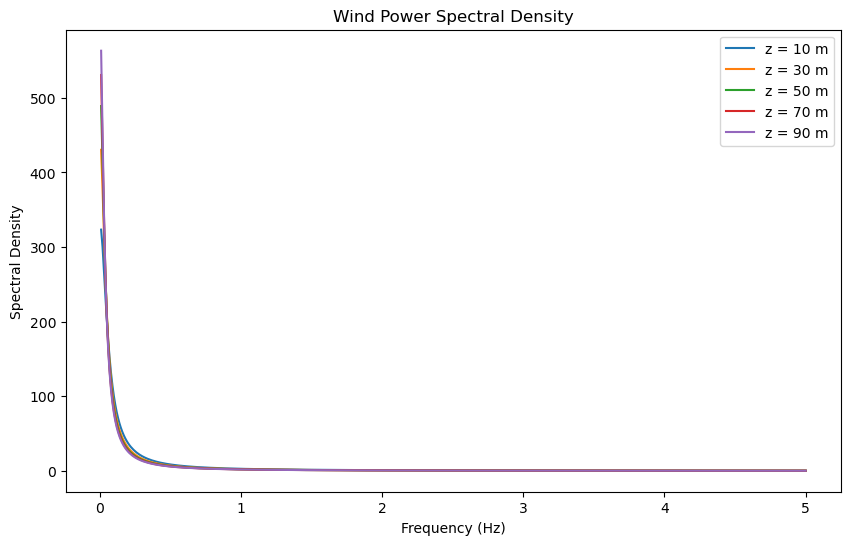

In [15]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

# 定义常量
U_r = 50  # m/s
z_r = 160  # m
alpha = 0.22
I_10 = 0.23

# 计算平均速度剖面
def mean_velocity_profile(z):
    return U_r * (z / z_r) ** alpha

# 计算湍流强度剖面
def turbulence_intensity_profile(z):
    I_u = I_10 * (z / 10) ** -alpha
    return I_u

# 计算湍流积分尺度剖面
def turbulence_integral_scale_profile(z):
    L_u_x = 100 * (z / 30) ** 0.5
    return L_u_x

# 计算Von Kármán风谱
def von_karman_spectrum(f, I_u, U_avg, L_u_x):
    return (4 * (I_u * U_avg) ** 2 * (L_u_x / U_avg)) / ((1 + 70.8 * (f * L_u_x / U_avg) ** 2) ** (5/6))

# 测量点坐标
z_values = np.array([10, 30, 50, 70, 90])

# 计算各点的风功率谱密度
f = np.linspace(0.01, 5, 500)
plt.figure(figsize=(10, 6))
for z in z_values:
    U_avg = mean_velocity_profile(z)
    I_u = turbulence_intensity_profile(z)
    L_u_x = turbulence_integral_scale_profile(z)
    S_u = von_karman_spectrum(f, I_u, U_avg, L_u_x)
    plt.plot(f, S_u, label=f'z = {z} m')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral Density')
plt.title('Wind Power Spectral Density')
plt.legend()
plt.show()


#### 1.4 Probability density curve

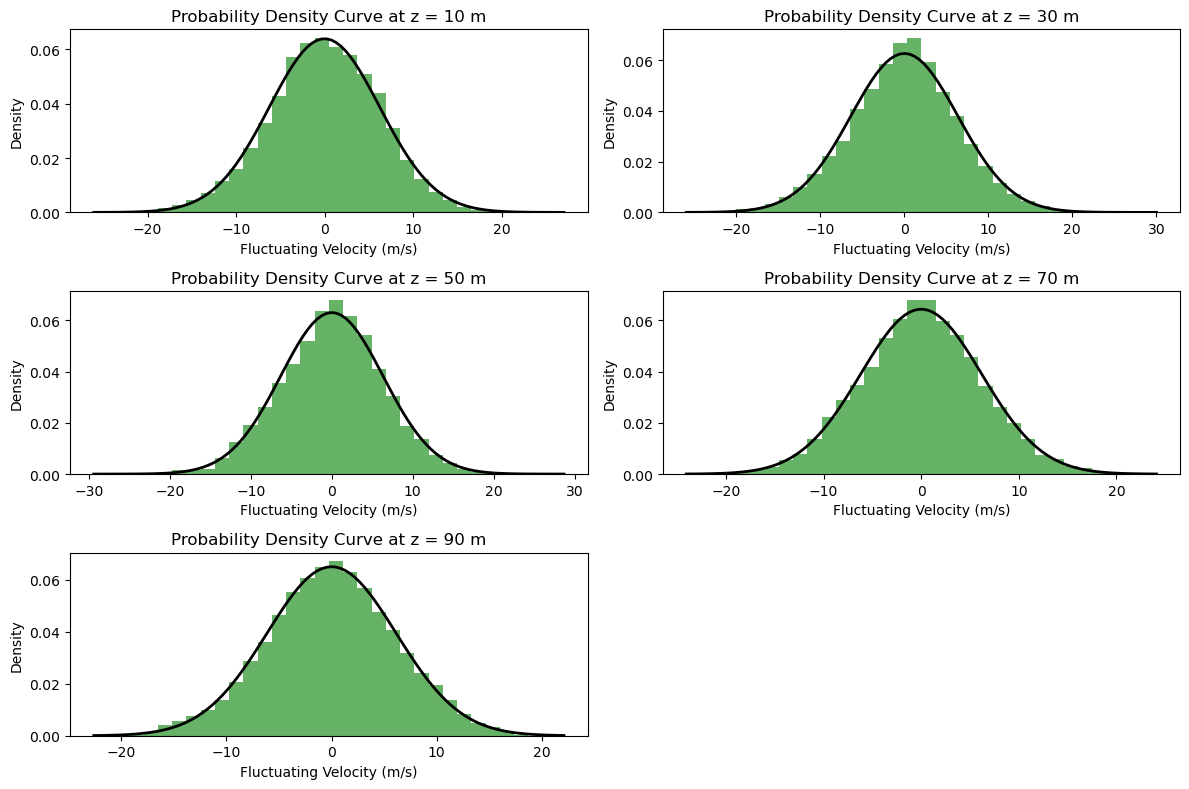

In [17]:
import scipy.io as sio

# load data
simDataPath = './windData/zDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData


# 测量点坐标
z_values = np.array([10, 30, 50, 70, 90])

# 计算各点的概率密度曲线
plt.figure(figsize=(12, 8))
for i, z in enumerate(z_values):
    u_fluctuations = U[i] - np.mean(U[i])
    mu, std = norm.fit(u_fluctuations)
    
    plt.subplot(3, 2, i+1)
    plt.hist(u_fluctuations, bins=30, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Probability Density Curve at z = {z} m')
    plt.xlabel('Fluctuating Velocity (m/s)')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### 2 Statistical results of the y-direction wind velocity time history

In [2]:
# load data
simDataPath = './windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData

#### 2.1 Spatial correlation coefficient in y direction

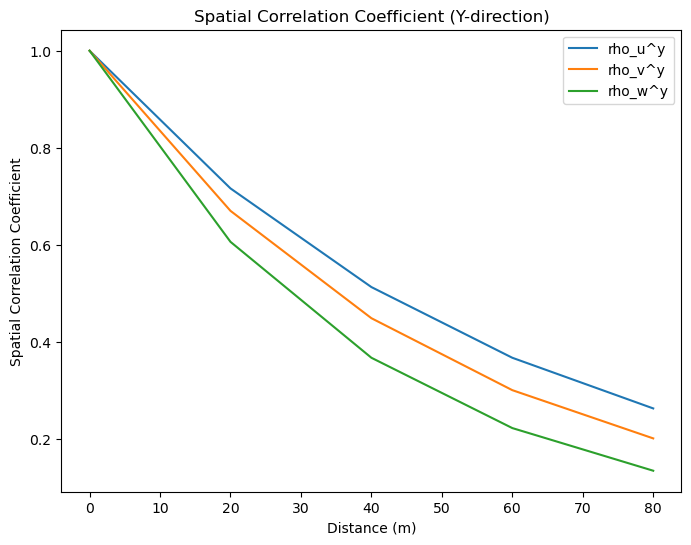

In [19]:
# load data
simDataPath = './windData/yDirData.mat'
simData = sio.loadmat(simDataPath, squeeze_me=True, struct_as_record=False)
U = simData['U']
V = simData['V']
W = simData['W']
X = simData['X']
Y = simData['Y']
Z = simData['Z']
dt = simData['dt']
del simData


# 定义常量
L_u_y, L_v_y, L_w_y = 60, 50, 40

# 计算空间相关系数
def spatial_correlation_coefficient(r, L_y):
    return np.exp(-np.abs(r) / L_y)

# 测量点坐标
y_values = np.array([0, 20, 40, 60, 80])
r_values = y_values - y_values[0]  # 以第一个点为参考点

# 计算各点的空间相关系数
rho_u_y = spatial_correlation_coefficient(r_values, L_u_y)
rho_v_y = spatial_correlation_coefficient(r_values, L_v_y)
rho_w_y = spatial_correlation_coefficient(r_values, L_w_y)

# 绘制空间相关系数图
plt.figure(figsize=(8, 6))
plt.plot(r_values, rho_u_y, label='rho_u^y')
plt.plot(r_values, rho_v_y, label='rho_v^y')
plt.plot(r_values, rho_w_y, label='rho_w^y')
plt.xlabel('Distance (m)')
plt.ylabel('Spatial Correlation Coefficient')
plt.title('Spatial Correlation Coefficient (Y-direction)')
plt.legend()
plt.show()